[Pnts1000.csv](https://drive.google.com/file/d/1HQfK0DkvLmlSckQ9N8YokT2XYadNkfJt/view?usp=share_link)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import json

data = pd.read_csv("Pnts1000.csv")

# Convert the input and target data to a pandas DataFrame and save to CSV
#data.to_csv('training_data.csv', index=False)

# Split the data into input features and target output
# Split the data into features (X) and target (y)
X = data[['HAND', 'GRD_VV', 'GRD_VH']]
y = data['Label']
scaler = StandardScaler()

# Fit the scaler to the training data and standardize the data
X_scaled = scaler.fit_transform(X)

# Print the mean and scale for each variable
for i, col in enumerate(X.columns):
    print(f"{col}: mean={scaler.mean_[i]}, scale={scaler.scale_[i]}")
#le = LabelEncoder()
# Fit and transform y to integer labels
#y_encoded = le.fit_transform(y)
#y = tf.keras.utils.to_categorical(y_encoded,num_classes = 2)


# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.5, random_state=42)

# Convert the data to numpy arrays
X_train = np.array(X_train)
X_val = np.array(X_val)
y_train = np.array(y_train)
y_val = np.array(y_val)
scaler_params = {"mean": scaler.mean_.tolist(),
                 "variance": scaler.var_.tolist(),
                 "scale": scaler.scale_.tolist()}

# Serialize the dictionary to a JSON string
scaler_json = json.dumps(scaler_params)

# Print the JSON string
print(scaler_json)

HAND: mean=9.711117695948618, scale=10.454584293358444
GRD_VV: mean=-9.357726579816088, scale=2.977308098581904
GRD_VH: mean=-14.493793117288298, scale=2.8506173358482143
{"mean": [9.711117695948618, -9.357726579816088, -14.493793117288298], "variance": [109.29833274693708, 8.864363513881392, 8.12601919543837], "scale": [10.454584293358444, 2.977308098581904, 2.8506173358482143]}


In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
from tensorflow.keras.initializers import HeNormal


model = Sequential()
#model.add(Dense(4, input_dim=3, activation='relu',kernel_initializer='he_normal',kernel_regularizer=tf.keras.regularizers.l2(0.05)))
model.add(Dense(4, input_dim=3, activation='leaky_relu',kernel_regularizer=tf.keras.regularizers.l2(0.1)))
#model.add(Dense(3, input_dim=3, activation='leaky_relu'))
model.add(Dense(1, activation='sigmoid'))
optimizer = keras.optimizers.Adam(learning_rate=0.01)
class_weight = {0: 1, 1: 1}  # higher weight for class 0

model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model for 20 epochs, using validation data for early stopping

history = model.fit(X_train, y_train, epochs=100,class_weight=class_weight, validation_data=(X_val, y_val), verbose=1)


Epoch 1/100
16/16 [==============================] - 1s 15ms/step - loss: 0.9378 - accuracy: 0.6245 - val_loss: 0.8478 - val_accuracy: 0.6522
Epoch 2/100
16/16 [==============================] - 0s 7ms/step - loss: 0.7766 - accuracy: 0.6897 - val_loss: 0.7376 - val_accuracy: 0.7134
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6886 - accuracy: 0.7292 - val_loss: 0.6765 - val_accuracy: 0.7055
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6368 - accuracy: 0.7530 - val_loss: 0.6397 - val_accuracy: 0.7036
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6046 - accuracy: 0.7470 - val_loss: 0.6147 - val_accuracy: 0.6976
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 0.5820 - accuracy: 0.7510 - val_loss: 0.5990 - val_accuracy: 0.7233
Epoch 7/100
16/16 [==============================] - 0s 7ms/step - loss: 0.5650 - accuracy: 0.7431 - val_loss: 0.5879 - val_accuracy: 0.7115
Epoch 8/100


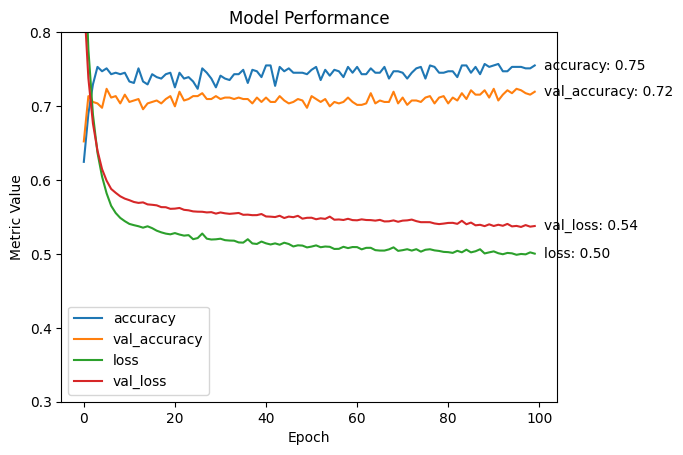

In [ ]:
import matplotlib.pyplot as plt

train_acc = history.history['accuracy']
val_acc= history.history['val_accuracy']
train_loss=history.history['loss']
val_loss=history.history['val_loss']
# Plot the training and validation accuracy
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')

plt.title('Model Performance')
plt.ylabel('Metric Value')
plt.xlabel('Epoch')
plt.ylim([0.3, 0.8])  # Set the y-axis limit to a maximum of 1
plt.legend(['accuracy', 'val_accuracy', 'loss', 'val_loss'], loc='lower left')

# Add final accuracy values to the plot
final_acc = [history.history['accuracy'][-1], history.history['val_accuracy'][-1], history.history['loss'][-1], history.history['val_loss'][-1]]
final_acc_labels = [f"accuracy: {final_acc[0]:.2f}", f"val_accuracy: {final_acc[1]:.2f}", f"loss: {final_acc[2]:.2f}", f"val_loss: {final_acc[3]:.2f}"]
for i, acc in enumerate(final_acc_labels):
    plt.annotate(acc, xy=(len(history.history['accuracy']), final_acc[i]), xytext=(len(history.history['accuracy'])+1, final_acc[i]), ha='left', va='center')

plt.show()

In [ ]:
model.summary()

for i, layer in enumerate(model.layers):
    print(f"Layer {i}:")
    print(f"Weights: {layer.get_weights()[0]}")
    print(f"Biases: {layer.get_weights()[1]}")
    print("")

weights_dict = {}
for i, layer in enumerate(model.layers):
    weights = layer.get_weights()
    weights_dict[f"layer_{i}"] = {"weights": [w.tolist() for w in weights]}
weights_json = json.dumps(weights_dict)

# Print the JSON string
print(weights_json)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 4)                 16        
                                                                 
 dense_17 (Dense)            (None, 1)                 5         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________
Layer 0:
Weights: [[ 0.33695027 -0.00156992 -0.11807518 -0.05900864]
 [-0.00760735  0.00581571 -0.01644227 -0.00292518]
 [-0.0053435   0.00831962  0.06323901  0.03520763]]
Biases: [ 0.03012163 -0.44228187  0.33640808  0.16835998]

Layer 1:
Weights: [[-6.2075787]
 [ 0.8709318]
 [ 2.717316 ]
 [ 1.4302877]]
Biases: [-0.78394806]

{"layer_0": {"weights": [[[0.33695027232170105, -0.0015699232462793589, -0.1180751770734787, -0.05900863930583], [-0.00760735

In [ ]:
# Make predictions on the validation data
import numpy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = model.predict(X_val) 
y_pred_binary = y_pred.round()


# Compute the confusion matrix
cm = confusion_matrix(y_val, y_pred_binary)

# Print the confusion matrix
print(cm)


# Compute the classification report
report = classification_report(y_val, y_pred_binary)

# Print the classification report
print(report)

16/16 [==============================] - 0s 1ms/step
[[140 113]
 [ 29 224]]
              precision    recall  f1-score   support

           0       0.83      0.55      0.66       253
           1       0.66      0.89      0.76       253

    accuracy                           0.72       506
   macro avg       0.75      0.72      0.71       506
weighted avg       0.75      0.72      0.71       506



[Google Earth Engine](https://code.earthengine.google.com/3a4befa4e8a189f3a278194655e9130d)